<a href="https://colab.research.google.com/github/yashpal64/Foundations-of-Data-Science/blob/main/FDS_Lab_Linear_Regression_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing all the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#import dataset from
data1=pd.read_csv('/content/drive/My Drive/FDS Lab/1. Simple linear regression.csv')
#import dataset from
data2=pd.read_csv('/content/drive/My Drive/FDS Lab/2. Multiple linear regression.csv')

In [ ]:
data1

,SAT,GPA
0,1714,2.40
1,1664,2.52
2,1760,2.54
3,1685,2.74
4,1693,2.83
...,...,...
79,1936,3.71
80,1810,3.71
81,1987,3.73
82,1962,3.76


In [ ]:
df=data1

In [ ]:
data1.describe()

,SAT,GPA
count,84.000000,84.000000
mean,1845.273810,3.330238
std,104.530661,0.271617
min,1634.000000,2.400000
25%,1772.000000,3.190000
50%,1846.000000,3.380000
75%,1934.000000,3.502500
max,2050.000000,3.810000


In [ ]:
data1.isnull().sum()

,0
SAT,0
GPA,0


In [ ]:
x_mean=np.mean(data1['SAT'])
y_mean=np.mean(data1['GPA'])

In [ ]:
x_mean

1845.2738095238096

In [ ]:
y_mean

3.330238095238095

In [ ]:
df

,SAT,GPA
0,1714,2.40
1,1664,2.52
2,1760,2.54
3,1685,2.74
4,1693,2.83
...,...,...
79,1936,3.71
80,1810,3.71
81,1987,3.73
82,1962,3.76


In [ ]:
#linear regression analysis
B1_num=0
B1_den=0
for i in range(len(data1)):
  B1_num+=(data1['SAT'][i]-x_mean)*(data1['GPA'][i]-y_mean)
  B1_den+=(data1['SAT'][i]-x_mean)**2
  B1=B1_num/B1_den
print(B1)

0.001655688050092815


In [ ]:
B0=y_mean-(B1*x_mean)
print(B0)

0.2750402996602781


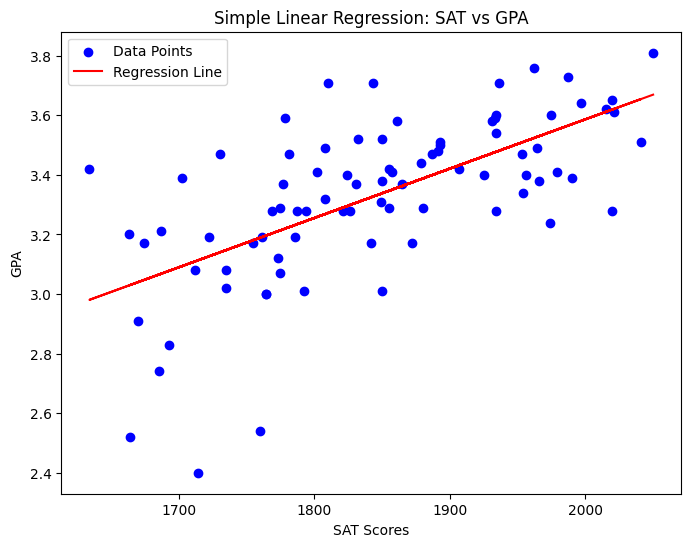

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(data1['SAT'], data1['GPA'], color='blue', label='Data Points')
plt.plot(data1['SAT'], B0 + B1 * data1['SAT'], color='red', label='Regression Line')
plt.xlabel('SAT Scores')
plt.ylabel('GPA')
plt.title('Simple Linear Regression: SAT vs GPA')
plt.legend()
plt.show()


In [ ]:
for i in range(len(data1)):
  y_hat=B0+B1*data1['SAT'][i]
  data1.loc[i, 'y_hat']=y_hat

In [ ]:
data1

,SAT,GPA,y_hat
0,1714,2.40,3.112890
1,1664,2.52,3.030105
2,1760,2.54,3.189051
3,1685,2.74,3.064875
4,1693,2.83,3.078120
...,...,...,...
79,1936,3.71,3.480452
80,1810,3.71,3.271836
81,1987,3.73,3.564892
82,1962,3.76,3.523500


In [ ]:
# prompt: design a code for calculate (GPA-y_hat)^2 and their summmision

sum_squared_errors = 0
for i in range(len(data1)):
  squared_error = (data1['GPA'][i] - data1['y_hat'][i])**2
  data1.loc[i, 'error']=squared_error
  sum_squared_errors += squared_error

print("Sum of squared errors:", sum_squared_errors)
#Sum of squared Residual (SSR)

Sum of squared errors: 3.6372727995805034


In [ ]:
data1

,SAT,GPA,y_hat,error
0,1714,2.40,3.112890,0.508212
1,1664,2.52,3.030105,0.260207
2,1760,2.54,3.189051,0.421268
3,1685,2.74,3.064875,0.105544
4,1693,2.83,3.078120,0.061564
...,...,...,...,...
79,1936,3.71,3.480452,0.052692
80,1810,3.71,3.271836,0.191988
81,1987,3.73,3.564892,0.027261
82,1962,3.76,3.523500,0.055932


In [ ]:
# prompt: desinn code to calulate sum_squared_errors\root(summision of (x-x_mean)^2)
import math
sum_x_minus_x_mean_squared = 0
for i in range(len(data1)):
  sum_x_minus_x_mean_squared += (data1['SAT'][i] - x_mean)**2

standard_error_of_estimate = (sum_squared_errors / math.sqrt(sum_x_minus_x_mean_squared))

print("Standard error of estimate:", standard_error_of_estimate)


Standard error of estimate: 0.003819382311854956


In [ ]:
t=B1/standard_error_of_estimate
print(t)

0.43349628680892605


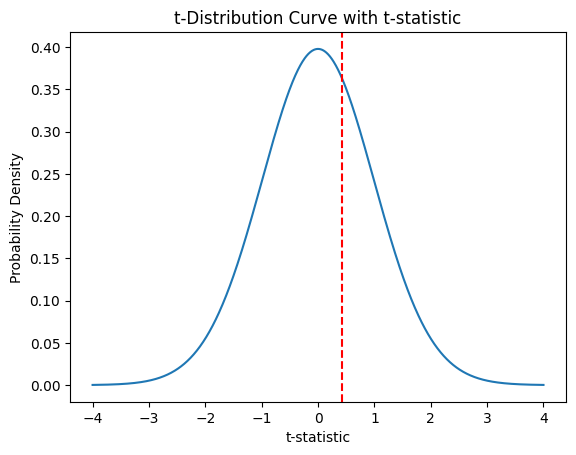

In [ ]:
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have calculated your t-statistic (t)
# df is the degrees of freedom, which is usually n-2 for simple linear regression

df = len(data1) - 2

# Generate x values for the t-distribution curve
x = np.linspace(-4, 4, 1000)

# Calculate the probability density function (PDF) for the t-distribution
y = stats.t.pdf(x, df)

# Plot the t-distribution curve
plt.plot(x, y)

# Add a vertical line to represent the calculated t-statistic
plt.axvline(t, color='red', linestyle='--')

# Label the axes and title
plt.xlabel('t-statistic')
plt.ylabel('Probability Density')
plt.title('t-Distribution Curve with t-statistic')

# Display the plot
plt.show()


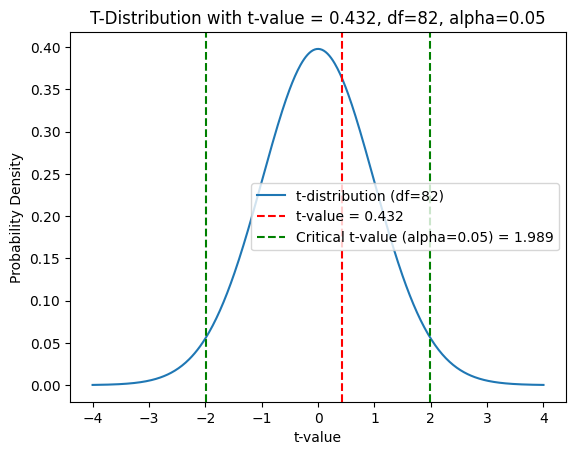

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Given values
t_val = 0.432
dof = 82
alpha = 0.05

# Generate x-values for the t-distribution curve
x = np.linspace(-4, 4, 500)

# Calculate the probability density function (PDF) for the t-distribution
pdf = stats.t.pdf(x, dof)

# Plot the t-distribution curve
plt.plot(x, pdf, label='t-distribution (df=82)')

# Add a vertical line at the calculated t-value
plt.axvline(x=t_val, color='red', linestyle='--', label='t-value = 0.432')

# Add critical t-values for two-tailed test
critical_t = stats.t.ppf(1 - alpha / 2, dof)
plt.axvline(x=critical_t, color='green', linestyle='--', label=f'Critical t-value (alpha=0.05) = {critical_t:.3f}')
plt.axvline(x=-critical_t, color='green', linestyle='--')


# Add labels and title
plt.xlabel('t-value')
plt.ylabel('Probability Density')
plt.title('T-Distribution with t-value = 0.432, df=82, alpha=0.05')
plt.legend()

# Show the plot
plt.show()

GENERATING RANDOM DATASET AND THEN CALULATING B0 AND B1

In [ ]:
# Set the random seed for reproducibility
np.random.seed(42)

# Generate x values
x_values = np.linspace(0, 10, 100)  # 100 values from 0 to 10

# Calculate the deterministic part of y
y_deterministic = 2 * x_values + 3

# Generate random error
random_error = np.random.normal(0, 6, size=x_values.shape)  # Mean = 0, StdDev = 1

# Calculate the y values with random error
y_values = y_deterministic + random_error

# Create a DataFrame
data = pd.DataFrame({'x': x_values, 'y': y_values})

# Print the first few rows of the dataset
print(data)

           x          y
0    0.00000   5.980285
1    0.10101   2.372434
2    0.20202   7.290172
3    0.30303  12.744240
4    0.40404   2.403161
..       ...        ...
95   9.59596  13.410830
96   9.69697  24.170661
97   9.79798  24.162291
98   9.89899  22.828661
99  10.00000  21.592477

[100 rows x 2 columns]


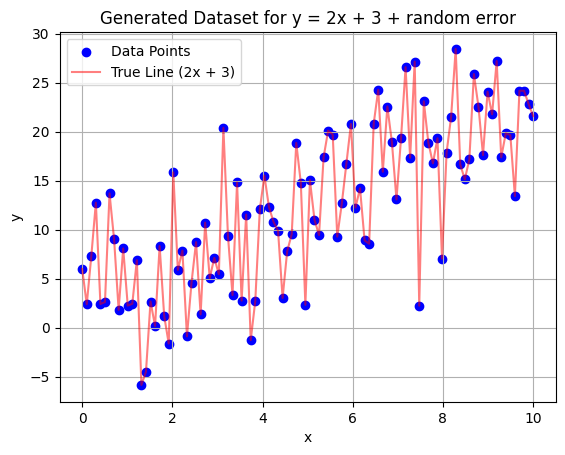

In [ ]:
# Plot the generated dataset
plt.scatter(data['x'], data['y'], label='Data Points', color='blue')
plt.plot(data['x'], data['y'], color='red', label='True Line (2x + 3)', alpha=0.5)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Generated Dataset for y = 2x + 3 + random error')
plt.legend()
plt.grid()
plt.show()

In [ ]:
#linear regression analysis
B1_num=0
B1_den=0
xm = np.mean(data['x'])
ym = np.mean(data['y'])
for i in range(len(data1)):
  B1_num+=(data['x'][i]-xm)*(data['y'][i]-ym)
  B1_den+=(data['x'][i]-xm)**2
  B1=B1_num/B1_den
print(B1)
B0=ym-(B1*ym)
print(B0)
for i in range(len(data1)):
  y_hat=B0+B1*data['x'][i]
  data.loc[i, 'y_hat']=y_hat

sum_squared_errors = 0
for i in range(len(data)):
  squared_error = (data['x'][i] - data['y_hat'][i])**2
  data.loc[i, 'error']=squared_error
  sum_squared_errors += squared_error

print("Sum of squared errors:", sum_squared_errors)
#Sum of squared Residual (SSR)
import math
sum_x_minus_x_mean_squared = 0
for i in range(len(data)):
  sum_x_minus_x_mean_squared += (data['x'][i] - xm)**2

standard_error_of_estimate = (sum_squared_errors / math.sqrt(sum_x_minus_x_mean_squared))

print("Standard error of estimate:", standard_error_of_estimate)
t=B1/standard_error_of_estimate
print(t)

2.125380388331477
-13.928744043878181
Sum of squared errors: nan
Standard error of estimate: nan
nan


In [ ]:
import random
y_1 = 2 * data1['SAT'] + 3 + np.random.random()
y_1

,SAT
0,3431.417411
1,3331.417411
2,3523.417411
3,3373.417411
4,3389.417411
...,...
79,3875.417411
80,3623.417411
81,3977.417411
82,3927.417411


In [ ]:
import numpy as np

# Example data (make sure both arrays have the same length)
x = np.linspace(0, 10, 500)      # 500 points from 0 to 10
y_1 = 2 * x + 3 + np.random.normal(0, 1, size=x.shape)  # y values calculated from x

# Calculate means
x_mean = np.mean(x)
y_mean = np.mean(y_1)

# Calculate beta1 (slope)
numerator = np.sum((x - x_mean) * (y_1 - y_mean))
denominator = np.sum((x - x_mean) ** 2)
beta1 = numerator / denominator

# Calculate beta0 (intercept)
beta0 = y_mean - (beta1 * x_mean)

# Print results
print(f"Beta0 (Intercept): {beta0}")
print(f"Beta1 (Slope): {beta1}")


Beta0 (Intercept): 3.164994382217511
Beta1 (Slope): 1.9818732032394673


In [ ]:
x_new = np.arange(1, 85)
x_new

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84])

In [ ]:
import numpy as np

# Example data
x = np.linspace(0, 10, 500)  # 500 points from 0 to 10
y_1 = (x ** 2) + np.random.normal(0, 1, size=x.shape)  # y values calculated from x

# Calculate means
x_mean = np.mean(x)
y_mean = np.mean(y_1)

# Calculate beta1 (slope)
numerator = np.sum((x - x_mean) * (y_1 - y_mean))
denominator = np.sum((x - x_mean) ** 2)
beta1 = numerator / denominator

# Calculate beta0 (intercept)
beta0 = y_mean - (beta1 * x_mean)

# Print results
print(f"Beta0 (Intercept): {beta0}")
print(f"Beta1 (Slope): {beta1}")


Beta0 (Intercept): -16.6840322230984
Beta1 (Slope): 10.014395826049638
